# Neural Networks Homework 7
## Mustafa Nazlıer-15050111035

### Import TensorFlow and other libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
import os
import time
import re

In [ ]:
name_of_the_file = 'The_Call_of_Cthulhu.txt'   ## Defining the name for the input book The Call of Cthulhu by H.P. Lovecraft

In [ ]:
from google.colab import files
uploaded = files.upload()             ## To upload our file to the environment, we will use 'files'

Saving The_Call_of_Cthulhu.txt to The_Call_of_Cthulhu (3).txt


In [ ]:

text = open(name_of_the_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 69524 characters


In [ ]:
# First 500 characters in the text
print(text[:500])

The Call of Cthulhu

by H. P. Lovecraft

Written Summer 1926

Published February 1928 in Weird Tales, Vol. 11, No. 2, p. 159-78, 287.

Of such great powers or beings there may be conceivably a survival… a survival of a hugely remote period when… consciousness was manifested, perhaps, in shapes and forms long since withdrawn before the tide of advancing humanity… forms of which poetry and legend alone have caught a flying memory and called them gods, monsters, mythical beings of all sorts and kin


In [ ]:
#Data Preprocessing

In [ ]:
    
text=re.sub('[^A-Za-z]+', ' ', text).strip().lower() 
print(text[:500])

the call of cthulhu by h p lovecraft written summer published february in weird tales vol no p of such great powers or beings there may be conceivably a survival a survival of a hugely remote period when consciousness was manifested perhaps in shapes and forms long since withdrawn before the tide of advancing humanity forms of which poetry and legend alone have caught a flying memory and called them gods monsters mythical beings of all sorts and kinds algernon blackwood i the horror in clay the 


In [ ]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

27 unique characters


In [ ]:
ids_from_chars = preprocessing.StringLookup(
    vocabulary=list(vocab), mask_token=None)

In [ ]:
chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [ ]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [ ]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(67836,), dtype=int64, numpy=array([21,  9,  6, ...,  6, 26,  6])>

In [ ]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [ ]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

t
h
e
 
c
a
l
l
 
o


In [ ]:
seq_length = 200
examples_per_epoch = len(text)//(seq_length+1)

In [ ]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b't' b'h' b'e' b' ' b'c' b'a' b'l' b'l' b' ' b'o' b'f' b' ' b'c' b't'
 b'h' b'u' b'l' b'h' b'u' b' ' b'b' b'y' b' ' b'h' b' ' b'p' b' ' b'l'
 b'o' b'v' b'e' b'c' b'r' b'a' b'f' b't' b' ' b'w' b'r' b'i' b't' b't'
 b'e' b'n' b' ' b's' b'u' b'm' b'm' b'e' b'r' b' ' b'p' b'u' b'b' b'l'
 b'i' b's' b'h' b'e' b'd' b' ' b'f' b'e' b'b' b'r' b'u' b'a' b'r' b'y'
 b' ' b'i' b'n' b' ' b'w' b'e' b'i' b'r' b'd' b' ' b't' b'a' b'l' b'e'
 b's' b' ' b'v' b'o' b'l' b' ' b'n' b'o' b' ' b'p' b' ' b'o' b'f' b' '
 b's' b'u' b'c' b'h' b' ' b'g' b'r' b'e' b'a' b't' b' ' b'p' b'o' b'w'
 b'e' b'r' b's' b' ' b'o' b'r' b' ' b'b' b'e' b'i' b'n' b'g' b's' b' '
 b't' b'h' b'e' b'r' b'e' b' ' b'm' b'a' b'y' b' ' b'b' b'e' b' ' b'c'
 b'o' b'n' b'c' b'e' b'i' b'v' b'a' b'b' b'l' b'y' b' ' b'a' b' ' b's'
 b'u' b'r' b'v' b'i' b'v' b'a' b'l' b' ' b'a' b' ' b's' b'u' b'r' b'v'
 b'i' b'v' b'a' b'l' b' ' b'o' b'f' b' ' b'a' b' ' b'h' b'u' b'g' b'e'
 b'l' b'y' b' ' b'r' b'e' b'm' b'o' b't' b'e' b' ' b'p' b'e' b'r' 

In [ ]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'the call of cthulhu by h p lovecraft written summer published february in weird tales vol no p of such great powers or beings there may be conceivably a survival a survival of a hugely remote period wh'
b'en consciousness was manifested perhaps in shapes and forms long since withdrawn before the tide of advancing humanity forms of which poetry and legend alone have caught a flying memory and called them'
b' gods monsters mythical beings of all sorts and kinds algernon blackwood i the horror in clay the most merciful thing in the world i think is the inability of the human mind to correlate all its conten'
b'ts we live on a placid island of ignorance in the midst of black seas of infinity and it was not meant that we should voyage far the sciences each straining in its own direction have hitherto harmed us'
b' little but some day the piecing together of dissociated knowledge will open up such terrifying vistas of reality and of our frightful position therein that we shall either go ma

In [ ]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [ ]:
dataset = sequences.map(split_input_target)

In [ ]:
for input_example, target_example in dataset.take(1):         #shifting
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'the call of cthulhu by h p lovecraft written summer published february in weird tales vol no p of such great powers or beings there may be conceivably a survival a survival of a hugely remote period w'
Target: b'he call of cthulhu by h p lovecraft written summer published february in weird tales vol no p of such great powers or beings there may be conceivably a survival a survival of a hugely remote period wh'


### Create training sets



In [ ]:
# Batch size
BATCH_SIZE = 64

 
BUFFER_SIZE = 10000      #to shuffle the dataset

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset shapes: ((64, 200), (64, 200)), types: (tf.int64, tf.int64)>

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):                       #RNN model
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,                                   #long products of matrices can lead to vanishing or exploding gradients, Gated Recurrent Units is a 
                                   return_sequences=True,                       #way to handle this type of anomalies, there are also Long Short-Term Memory(LSTM)
                                   return_state=True)                                
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [ ]:
model = MyModel(
    # Be sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

For each character the model looks up the embedding, runs the GRU one timestep with the embedding as input, and applies the dense layer to generate logits predicting the log-likelihood of the next character:

![A drawing of the data passing through the model](https://github.com/tensorflow/text/blob/master/docs/tutorials/images/text_generation_training.png?raw=1)

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 200, 28) # (batch_size, sequence_length, vocab_size)


In the above example the sequence length of the input is `100` but the model can be run on inputs of any length:

In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  7168      
_________________________________________________________________
gru (GRU)                    multiple                  3938304   
_________________________________________________________________
dense (Dense)                multiple                  28700     
Total params: 3,974,172
Trainable params: 3,974,172
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [ ]:
sampled_indices

array([ 3,  1, 21, 10, 22, 22,  9, 17, 25, 25, 24, 16, 20, 25,  8, 22, 24,
       26,  4, 18,  1, 10, 16, 16, 21, 24, 26, 19, 16, 16, 25, 20, 21, 24,
       14, 20,  5, 25,  8, 11, 21, 26, 19, 13, 10, 14,  5, 23, 16, 13, 19,
       25, 20, 20, 16,  9,  0,  0, 21, 17, 10, 11, 11, 17, 13,  2, 17, 10,
       10, 23,  5, 27,  9, 25,  0, 17,  8,  1, 26,  9, 23,  4, 25, 23, 20,
        9, 20,  8,  1, 21, 22,  3, 27,  4, 19, 11,  8, 27, 27,  1,  9,  7,
        0, 21,  3, 23,  0,  0,  3,  5,  7,  8, 16, 20,  0,  8, 20, 21,  5,
       18, 24, 18, 17, 25,  3, 17, 25, 22,  0, 25,  6, 16, 21, 22, 19, 23,
        3, 25,  0, 25,  8, 24, 27,  9, 17, 14, 15, 12, 21, 13, 26, 19,  3,
       24, 17,  6, 19,  4,  3, 23, 27, 14, 20, 16, 16, 23, 15, 11, 14, 20,
        7,  0,  7,  3, 20,  5, 13,  4, 16, 22,  1, 18,  4, 16,  5,  3,  2,
       17, 21, 12, 26, 24,  8, 15, 11, 15,  3,  8, 21, 19])

In [ ]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'able from any local source his name was john raymond legrasse and he was by profession an inspector of police with him he bore the subject of his visit a grotesque repulsive and apparently very ancien'

Next Char Predictions:
 b'b tiuuhpxxwosxguwycq iootwyrooxstwmsdxgjtyrlimdvolrxssoh[UNK][UNK]tpijjplapiivdzhx[UNK]pg yhvcxvshsg tubzcrjgzz hf[UNK]tbv[UNK][UNK]bdfgos[UNK]gstdqwqpxbpxu[UNK]xeoturvbx[UNK]xgwzhpmnktlyrbwpercbvzmsoovnjmsf[UNK]fbsdlcou qcodbaptkywgnjnbgtr'


## Train the model

### Attach an optimizer, and a loss function

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## training

In [ ]:
EPOCHS = 100

In [ ]:
history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/100
5/5 [==============================] - 2s 108ms/step - loss: 4.3485 - accuracy: 0.1456
Epoch 2/100
5/5 [==============================] - 1s 95ms/step - loss: 3.1252 - accuracy: 0.1966
Epoch 3/100
5/5 [==============================] - 1s 96ms/step - loss: 3.1667 - accuracy: 0.2115
Epoch 4/100
5/5 [==============================] - 1s 96ms/step - loss: 3.0880 - accuracy: 0.1960
Epoch 5/100
5/5 [==============================] - 1s 97ms/step - loss: 2.9125 - accuracy: 0.1420
Epoch 6/100
5/5 [==============================] - 1s 96ms/step - loss: 2.7591 - accuracy: 0.1890
Epoch 7/100
5/5 [==============================] - 1s 98ms/step - loss: 2.7040 - accuracy: 0.2041
Epoch 8/100
5/5 [==============================] - 1s 97ms/step - loss: 2.6227 - accuracy: 0.2470
Epoch 9/100
5/5 [==============================] - 1s 97ms/step - loss: 2.5492 - accuracy: 0.2730
Epoch 10/100
5/5 [==============================] - 1s 97ms/step - loss: 2.4784 - accuracy: 0.2888
Epoch 11/100
5/5 [

## Generate text

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [ ]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['Generated text:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)


Generated text:o custan were but before the teorrible formid with fir the great noce op and toward their dast socting buriad the figurat of all eshand be asponith in durady talfional forw for some from smow heard the woods it was the police all its contence asticts and older thing whilst it was vanusce whose gohe puriary with heart with their kestly with untomn before the eddor mound at the delebreice and in a small manuscript earer was belink sidce of men a boom of mether of his visitation as what ha untlamented professor in mighty but before the worded older that its mounten whor him exlide after ot provinged the first men commor to men from inlisine subes of the baser abterroly the lixed blad oldres and his men were aithone was at lystiag of porears that eared baight in the sunsain see mugh nearly slofe therrible voodeous res guling about fit as it was i hade cthulhu untlem recelt and april ndatus of hangested up at aly profted went no mighty and i recomental interest futhismed with

In [ ]:
##Additional example

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Model
from tensorflow.keras.layers import Embedding, Dense, LSTM
import pandas as pd


In [ ]:
##AS an example for to many to one implementation, I have also added to this short part to our lab, this is text classification using an embedding and a LSTM layer 

In [ ]:

class TextRNN(Model):
    def __init__(self,
                 maxlen,
                 max_features,
                 embedding_dims,
                 class_num=1,
                 last_activation='sigmoid'):
        super(TextRNN, self).__init__()
        self.maxlen = maxlen
        self.max_features = max_features
        self.embedding_dims = embedding_dims
        self.class_num = class_num
        self.last_activation = last_activation
        self.embedding = Embedding(self.max_features, self.embedding_dims, input_length=self.maxlen)
        self.rnn = LSTM(128)  # LSTM or GRU
        self.classifier = Dense(self.class_num, activation=self.last_activation)

    def call(self, inputs):
        if len(inputs.get_shape()) != 2:
            raise ValueError('The rank of inputs of TextRNN must be 2, but now is %d' % len(inputs.get_shape()))
        if inputs.get_shape()[1] != self.maxlen:
            raise ValueError('The maxlen of inputs of TextRNN must be %d, but now is %d' % (self.maxlen, inputs.get_shape()[1]))
        embedding = self.embedding(inputs)
        x = self.rnn(embedding)
        output = self.classifier(x)
        return output

In [ ]:
import timeit

max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
epochs = 10

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)...')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = TextRNN(maxlen, max_features, embedding_dims)
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')
%time h =  model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs, callbacks=[early_stopping], validation_data=(x_test, y_test))
                
               
                

print('Test...')
result = model.predict(x_test)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)...
x_train shape: (25000, 400)
x_test shape: (25000, 400)
Build model...
Train...
Epoch 1/10
782/782 [==============================] - 28s 34ms/step - loss: 0.4755 - accuracy: 0.7676 - val_loss: 0.3701 - val_accuracy: 0.8435
Epoch 2/10
782/782 [==============================] - 25s 32ms/step - loss: 0.3260 - accuracy: 0.8646 - val_loss: 0.3535 - val_accuracy: 0.8524
Epoch 3/10
782/782 [==============================] - 25s 32ms/step - loss: 0.2736 - accuracy: 0.8911 - val_loss: 0.3206 - val_accuracy: 0.8776
Epoch 4/10
782/782 [==============================] - 25s 32ms/step - loss: 0.2191 - accuracy: 0.9149 - val_loss: 0.3272 - val_accuracy: 0.8752
Epoch 5/10
782/782 [==============================] - 26s 33ms/step - loss: 0.1931 - accuracy: 0.9248 - val_loss: 0.4028 - val_accuracy: 0.8424
Epoch 6/10
782/782 [==============================] - 26s 33ms/step - loss: 0.1655 - accuracy: 0.9384 - val_loss: 0.3678 - v

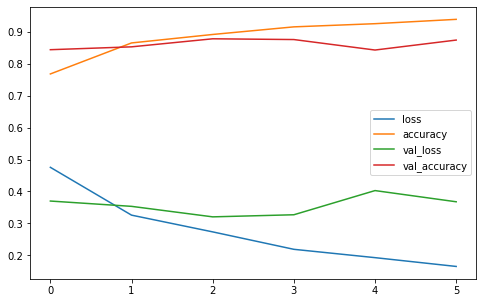

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
